# Test03 Monthly

In [1]:
from neuralprophet import NeuralProphet
import pandas as pd

In [2]:
df = pd.read_csv('monthly10.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      831 non-null    object 
 1   y       831 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.1+ KB


In [4]:
df.head()

,ds,y
0,1953-04-01,2.83
1,1953-05-01,3.05
2,1953-06-01,3.11
3,1953-07-01,2.93
4,1953-08-01,2.95


In [5]:
df.tail()

,ds,y
826,2022-02-01,1.93
827,2022-03-01,2.13
828,2022-04-01,2.75
829,2022-05-01,2.90
830,2022-06-01,3.14


In [6]:
df.describe()

,y
count,831.000000
mean,5.607786
std,2.927550
min,0.620000
25%,3.460000
50%,5.020000
75%,7.405000
max,15.320000


In [7]:
m = NeuralProphet()

In [8]:
metrics = m.fit(df, freq="M")

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 206


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.94E-01, min: 4.31E-02


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.55E-01, min: 4.31E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.07E-01
Epoch[206/206]: 100%|█| 206/206 [00:11<00:00, 17.64it/s, SmoothL1Loss=0.00223, M


In [9]:
future = m.make_future_dataframe(df=df, periods=12)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M


In [10]:
forecast = m.predict(df=future)

INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to 83.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to 83.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M


### Plotting

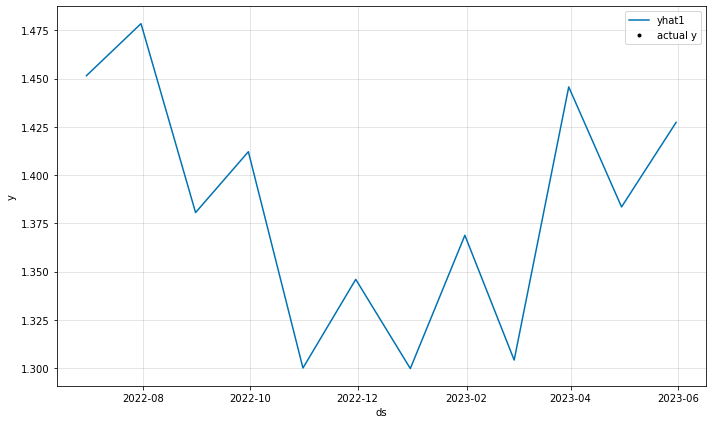

In [11]:
fig_forecast = m.plot(forecast)

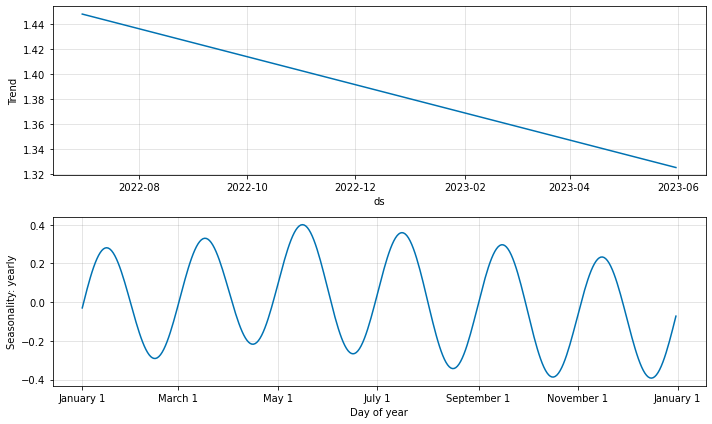

In [12]:
fig_comp = m.plot_components(forecast)

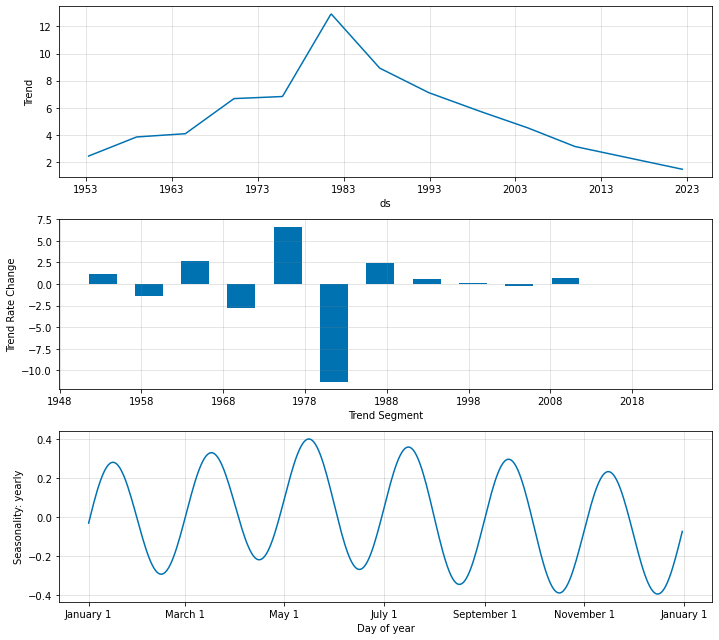

In [13]:
fig_param = m.plot_parameters()

## Validation

In [14]:
# Manual Split
m = NeuralProphet()
df_train, df_test = m.split_df(df, valid_p=0.2)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.576% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS


In [15]:
train_metrics = m.fit(df_train)
test_metrics = m.test(df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.579% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 222


  0%|          | 0/122 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.50E-02, min: 1.49E-01


  0%|          | 0/122 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.50E-02, min: 4.17E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.87E-02
Epoch[222/222]: 100%|█| 222/222 [00:10<00:00, 21.51it/s, SmoothL1Loss=0.00404, M
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.964% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.003  0.595  0.746


In [16]:
# Builtin Function

m = NeuralProphet()
metrics = m.fit(df_train, validation_df=df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.579% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 222


  0%|          | 0/122 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.52E-02, min: 3.51E-01


  0%|          | 0/122 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.52E-02, min: 3.51E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.27E-02
Epoch[222/222]: 100%|█| 222/222 [00:10<00:00, 21.29it/s, SmoothL1Loss=0.00404, M
